### 네이버 영화 <삼진그룹 영어토익반> 별점 페이지 접근 해보기

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=189141'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [3]:
start_page = '&page=8'

In [4]:
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [5]:
reply_list = soup.select_one('.score_result').find_all('li')
len(reply_list)

10

In [6]:
star_score = int(reply_list[0].select_one('.star_score').get_text().strip())
star_score

10

In [7]:
len(reply_list[3].find_all('span'))

10

In [8]:
from datetime import datetime
datetime = datetime.strptime(reply_list[0].find('dt').get_text().split('\n')[-2], "%Y.%m.%d %H:%M")
time = datetime.time()
date = datetime.date()
str(time)

'17:42:00'

In [9]:
sym = int(reply_list[0].select_one('.btn_area').find_all('strong')[0].get_text())
nonsym = int(reply_list[0].select_one('.btn_area').find_all('strong')[1].get_text())
sym,nonsym


(54, 23)

### 페이지 1개 데이터 데이터프레임만들기

In [10]:
star_score_list = []; contents_list = []; time_list = []
sym_list = []; nonsym_list = []
for reply in reply_list:
    star_score = int(reply.select_one('.star_score').get_text().strip())
    contents = reply.find_all('span')[3].get_text().strip()
    time = reply.find('dt').get_text().split('\n')[-2].split(' ')[0]
    sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
    nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
    star_score_list.append(star_score)
    contents_list.append(contents)
    time_list.append(time)
    sym_list.append(sym)
    nonsym_list.append(nonsym)

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df

,별점,내용,작성일,공감,비공감
0,10,어제의 너 보다 오늘 더 성장할 수 있는 하루를 보내길,2020.10.23,54,23
1,10,오상무로 출연한 백현진씨 연기 짱입니다,2020.10.21,57,26
2,7,주연 셋 조합 최고..고아성 최고..,2020.10.29,44,14
3,10,세 배우를 비롯한 조연들의 탄탄한 연기+쫀쫀한 스토리+감동과 재미까지 완벽한 영화였...,2020.10.22,57,27
4,10,김유진(mhj6****),2020.10.21,62,33
5,10,레트로 감성 가득한 영화였네요 좋았습니다,2020.10.21,54,26
6,10,BABY96(love****),2020.10.21,62,34
7,10,사람은 무엇으로 사는지 다시 생각하게 하는 영화,2020.10.26,45,19
8,1,스포일러가 포함된 감상평입니다. 감상평 보기,2020.11.25,56,31
9,8,90년대 느낌 좋아하는분들에겐 볼만해요..중후반에 조금 과하게 늘어지는 느낌이 있지...,2020.10.24,42,18


In [13]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
total

7535

In [14]:
end_page = (total // 10) + 1
end_page

754

### 전체 페이지 크롤링 후 데이터 프레임만들기

In [15]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=189141'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [16]:
start_page = '&page=1'
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [17]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
end_page = (total // 10) + 1  # 한 페이지에 댓글 10개씩

In [18]:
from tqdm import tqdm_notebook

In [19]:
from datetime import datetime

In [20]:
star_score_list = []; contents_list = []; date_list = [];time_list = []
sym_list = []; nonsym_list = []
for i in tqdm_notebook(range(end_page)):
    page = f'&page={i + 1}'
    html = urlopen(url_base + iframe + page)
    soup = BeautifulSoup(html, 'html.parser')
    reply_list = soup.select_one('.score_result').find_all('li')
    for reply in reply_list:
        star_score = int(reply.select_one('.star_score').get_text().strip())
        datetime = datetime.strptime(reply.find('dt').get_text().split('\n')[-2], "%Y.%m.%d %H:%M")
        date = datetime.date()
        time = datetime.time()
        sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
        nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
        spans = reply.find_all('span')
        if len(spans) == 9:
            contents = reply.find_all('span')[3].get_text().strip()
        elif len(spans) == 8:
            contents = reply.find_all('span')[2].get_text().strip()
        else: 
            contents = ''
        star_score_list.append(star_score)
        contents_list.append(contents)
        date_list.append(date)
        time_list.append(time)
        sym_list.append(sym)
        nonsym_list.append(nonsym)

In [21]:
df2 = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : date_list,
    '작성시간' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df2

,별점,내용,작성일,작성시간,공감,비공감
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1836,362
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1652,307
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1442,289
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1267,275
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,1114,260
...,...,...,...,...,...,...
7530,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24
7531,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36
7532,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37
7533,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41


In [22]:
df2.to_csv('Movie_reply.csv', sep=',',encoding='utf8')

In [23]:
df2.describe()

,별점,공감,비공감
count,7535.000000,7535.000000,7535.000000
mean,8.365494,4.434240,2.635965
std,2.931784,45.502362,11.860800
min,1.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000
75%,10.000000,2.000000,2.000000
max,10.000000,1836.000000,362.000000


In [24]:
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


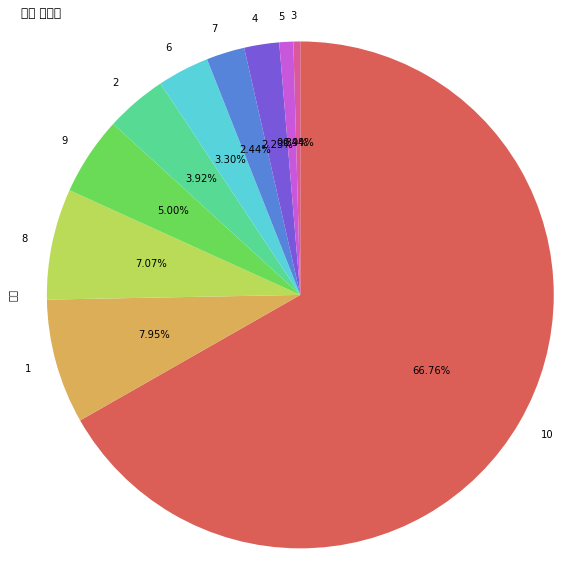

In [25]:
fig = plt.figure(figsize=(10,10)) 
labels = df2['별점'].value_counts().index.tolist()
labels.sort()
colors = sns.color_palette('hls',len(labels))
df2['별점'].value_counts().plot.pie(startangle=90,
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors )
plt.axis('equal')
plt.title('별점 분포도',loc = 'left')
plt.show()

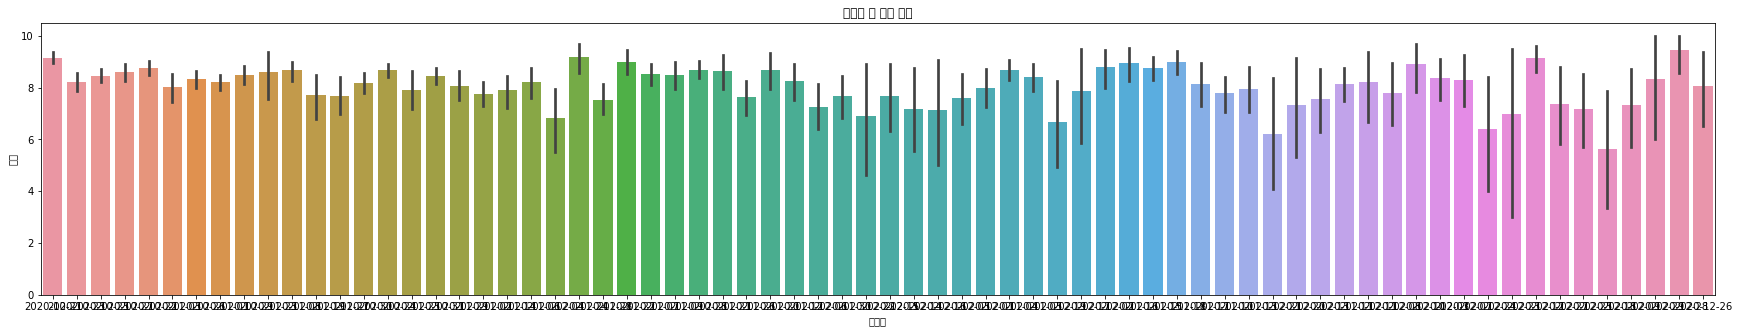

In [26]:
fig = plt.figure(figsize=(30,5)) 
sns.barplot(x='작성일',y='별점',data=df2)
plt.title('작성일 별 별점 평균')
plt.show()

In [27]:
# 작성일에서 요일 가져오기
weekday = []
for i in df2['작성일'].tolist():
    weekday.append(i.weekday())

In [28]:
df2['작성요일'] = weekday
df2

,별점,내용,작성일,작성시간,공감,비공감,작성요일
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1836,362,2
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1652,307,2
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1442,289,2
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1267,275,2
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,1114,260,2
...,...,...,...,...,...,...,...
7530,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24,2
7531,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36,4
7532,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37,0
7533,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41,5


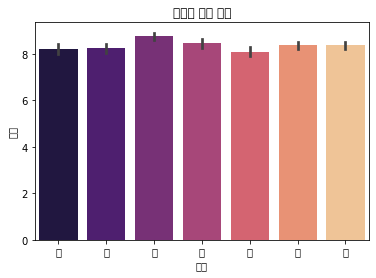

In [29]:
sns.barplot(x='작성요일',y ='별점',data = df2,palette = 'magma')
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.xlabel('요일')
plt.title('요일별 평점 평균')
plt.show()

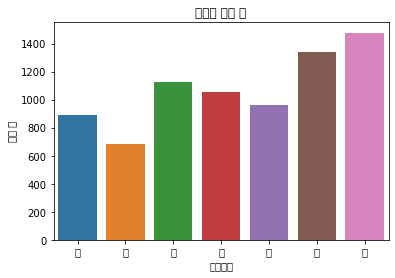

In [30]:
sns.countplot(x='작성요일',data=df2)
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.ylabel('댓글 수')
plt.title('요일별 댓글 수')
plt.show()

In [31]:
# 작성시간 시간대별로 나누기
df2['작성시간'] = df2['작성시간'].astype(str)
tmp = []
for i in df2['작성시간'].tolist():
    tmp.append(i.replace(':',''))
df2['tmp'] = tmp
df2['tmp'].astype(int)
df2

,별점,내용,작성일,작성시간,공감,비공감,작성요일,tmp
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1836,362,2,135300
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1652,307,2,154300
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1442,289,2,153600
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1267,275,2,154400
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,1114,260,2,135200
...,...,...,...,...,...,...,...,...
7530,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24,2,111300
7531,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36,4,021400
7532,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37,0,064600
7533,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41,5,085400


In [32]:
bins = [000000,60000,100000,180000,210000,240000]
labels = ["새벽", "아침", "낮", "저녁", "밤"]
cats = pd.cut(tmp, bins, labels = labels)
df2['time_div'] = cats
df2

,별점,내용,작성일,작성시간,공감,비공감,작성요일,tmp,time_div
0,10,어제의 너 보다 오늘 더 성장했는데~? ㅋㅋ 명대사! 너무재밌었어요!! +_+ 기대...,2020-10-21,13:53:00,1836,362,2,135300,새벽
1,10,2020년 본 영화중에 가장 기분 좋게 본 영화같아요,2020-10-21,15:43:00,1652,307,2,154300,낮
2,10,근래 본 영화 중 최고! 박혜수 진짜 너무 귀여워ㅜㅜ,2020-10-21,15:36:00,1442,289,2,153600,낮
3,10,억지신파 내용 아니라서 더 맘에 들어요 배우들 케미 좋네요ㅎㅎ,2020-10-21,15:44:00,1267,275,2,154400,낮
4,10,정의로운 세상을 꿈꾸게 되는 영화였습니다 좋아요ㅎㅎ,2020-10-21,13:52:00,1114,260,2,135200,낮
...,...,...,...,...,...,...,...,...,...
7530,1,공짜 티켓 생겨서 시간 때울 겸 봤는데 시간이 더 느리게 가는 매직~ 결국 ‘걸캅스...,2020-10-21,11:13:00,6,24,2,111300,낮
7531,8,페미 여부를 떠나 최근에 꽤나 재미 있게 본 영화^^추천 드려요^^,2020-10-23,02:14:00,17,36,4,021400,새벽
7532,10,재밌게 공감하면서 봤어요 이거 별점 1점 하는 남자들 이유 알 듯,2020-11-02,06:46:00,13,37,0,064600,새벽
7533,10,유아인 연기 개잘햇 진짜,2020-10-31,08:54:00,7,41,5,085400,새벽


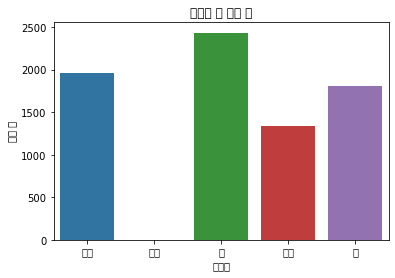

In [33]:
sns.countplot(x='time_div',data = df2)
plt.ylabel('댓글 수')
plt.xlabel('시간대')
plt.title('시간대 별 댓글 수')
plt.show()

### 네이버 영화 <도굴> 별점 페이지 접근 해보기

In [34]:
url_base = 'https://movie.naver.com'
url_sub =  '/movie/bi/mi/point.nhn?code=193194'
url = url_base + url_sub
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
iframe = soup.find('iframe')['src']

In [35]:
start_page = '&page=1'
html = urlopen(url_base + iframe + start_page)
soup = BeautifulSoup(html, 'html.parser')

In [36]:
total = int(soup.select_one('.total').find('em').get_text().replace(',',''))
end_page = (total // 10) + 1

In [37]:
star_score_list = []; contents_list = []; date_list = [];time_list = []
sym_list = []; nonsym_list = []
for i in tqdm_notebook(range(end_page)):
    page = f'&page={i + 1}'
    html = urlopen(url_base + iframe + page)
    soup = BeautifulSoup(html, 'html.parser')
    reply_list = soup.select_one('.score_result').find_all('li')
    for reply in reply_list:
        star_score = int(reply.select_one('.star_score').get_text().strip())
        datetime = datetime.strptime(reply.find('dt').get_text().split('\n')[-2], "%Y.%m.%d %H:%M")
        date = datetime.date()
        time = datetime.time()
        sym = int(reply.select_one('.btn_area').find_all('strong')[0].get_text())
        nonsym = int(reply.select_one('.btn_area').find_all('strong')[1].get_text())
        spans = reply.find_all('span')
        if len(spans) == 9:
            contents = reply.find_all('span')[3].get_text().strip()
        elif len(spans) == 8:
            contents = reply.find_all('span')[2].get_text().strip()
        else: 
            contents = ''
        star_score_list.append(star_score)
        contents_list.append(contents)
        date_list.append(date)
        time_list.append(time)
        sym_list.append(sym)
        nonsym_list.append(nonsym)

In [38]:
df3 = pd.DataFrame({
    '별점' : star_score_list,
    '내용' : contents_list,
    '작성일' : date_list,
    '작성시간' : time_list,
    '공감' : sym_list,
    '비공감' : nonsym_list
})
df3

,별점,내용,작성일,작성시간,공감,비공감
0,4,내 시간을 도굴당해버렸다..,2020-11-08,15:41:00,762,305
1,7,킬링타임용 영화 내용은 좀 뻔함 여운 없음,2020-11-05,13:23:00,634,215
2,10,이제훈 진짜 멋있당 ㅋㅋㅋ 웃을때마다 심쿵 ㅜㅜ,2020-11-04,15:26:00,595,331
3,10,내용은 평이했으나 신혜선이 예쁘다. 특히 눈매가 참 예쁘다. 사랑스럽다.,2020-11-06,14:30:00,480,242
4,10,이제훈 이런 캐릭터도 완젼 찰떡이네 ㅋㅋ 요즘시기에 유쾌하게 보기 좋은 영화,2020-11-06,16:01:00,347,146
...,...,...,...,...,...,...
3510,5,재미있으면 추천 vs 재미없으면 비추천눌러주세요,2020-11-04,09:24:00,23,33
3511,10,"깔깔 웃으면서 보게 되는 영화, 다들 연기 너무 잘함ㅋ",2020-11-04,19:50:00,24,34
3512,10,너무 재미있고 즐겁게 봤습니다 ㅎㅎ,2020-11-07,12:10:00,9,20
3513,6,나름대로 잘봤습니다 신선한소재라 재밌었지만막판에 너무 코미디적 요소가 많아 ㅋ,2020-11-05,13:11:00,15,26


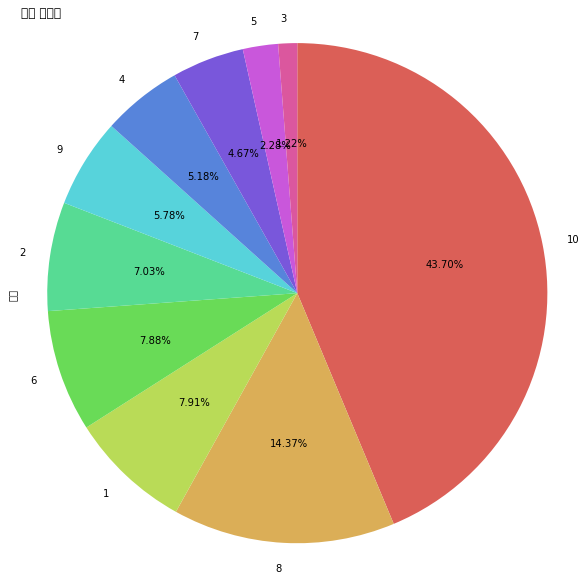

In [39]:
fig = plt.figure(figsize=(10,10)) 
labels = df3['별점'].value_counts().index.tolist()
labels.sort()
colors = sns.color_palette('hls',len(labels))
df3['별점'].value_counts().plot.pie(startangle=90,
       counterclock=False, 
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors )
plt.axis('equal')
plt.title('별점 분포도',loc = 'left')
plt.show()

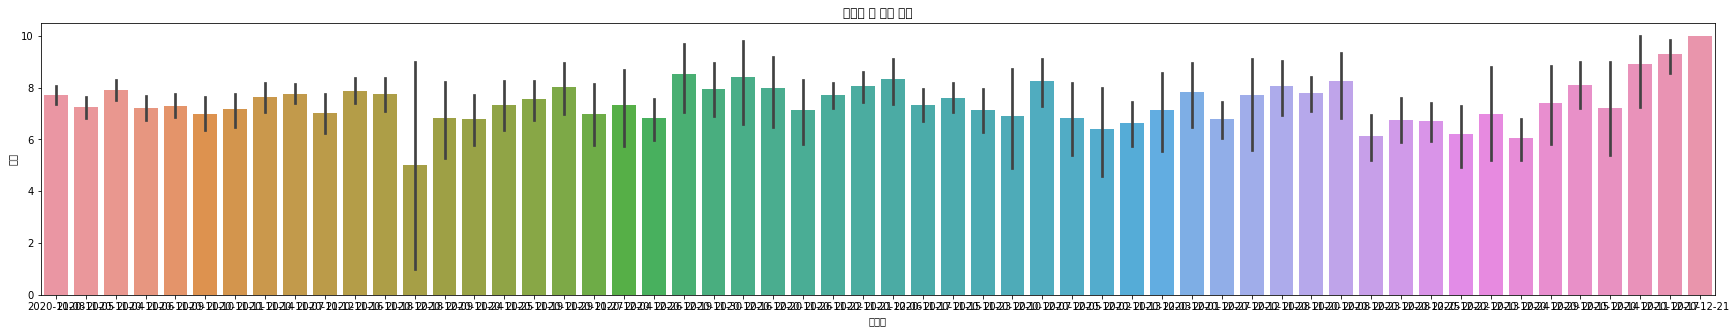

In [40]:
fig = plt.figure(figsize=(30,5)) 
sns.barplot(x='작성일',y='별점',data=df3)
plt.title('작성일 별 별점 평균')
plt.show()

In [41]:
weekday = []
for i in df3['작성일'].tolist():
    weekday.append(i.weekday())

In [42]:
df3['작성요일'] = weekday

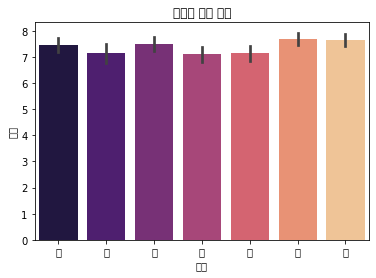

In [43]:
sns.barplot(x='작성요일',y ='별점',data = df3,palette = 'magma')
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.xlabel('요일')
plt.title('요일별 평점 평균')
plt.show()

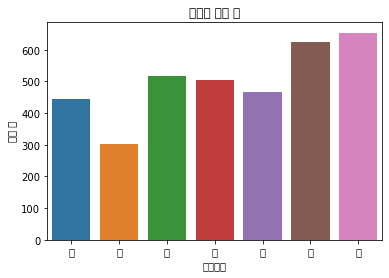

In [44]:
sns.countplot(x='작성요일',data=df3)
plt.xticks([0, 1, 2, 3, 4, 5, 6],
           ['월','화','수','목','금','토','일'])
plt.ylabel('댓글 수')
plt.title('요일별 댓글 수')
plt.show()

In [45]:
df3['작성시간'] = df3['작성시간'].astype(str)
tmp = []
for i in df3['작성시간'].tolist():
    tmp.append(i.replace(':',''))
df3['tmp'] = tmp
df3['tmp'].astype(int)

0       154100
1       132300
2       152600
3       143000
4       160100
         ...  
3510     92400
3511    195000
3512    121000
3513    131100
3514      4800
Name: tmp, Length: 3515, dtype: int64

In [46]:
bins = [000000,60000,100000,180000,210000,240000]
labels = ["새벽", "아침", "낮", "저녁", "밤"]
cats = pd.cut(tmp, bins, labels = labels)
df3['time_div'] = cats

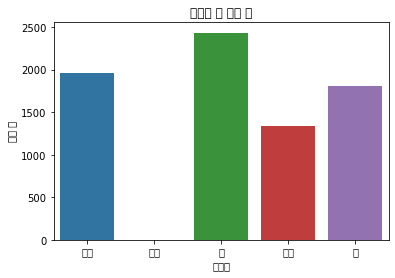

In [47]:
sns.countplot(x='time_div',data = df2)
plt.ylabel('댓글 수')
plt.xlabel('시간대')
plt.title('시간대 별 댓글 수')
plt.show()